[View in Colaboratory](https://colab.research.google.com/github/ZER-0-NE/ML_problems/blob/master/cfps_last.ipynb)

In [2]:
from google.colab import auth
auth.authenticate_user()

!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# from tensorflow.python.client import device_lib
# device_lib.list_local_devices()
#!ls
!rm -rf test

In [0]:
!ls

In [3]:
fileId = drive.CreateFile({'id': '1jdbV396tG37VoDGbPYTiEbRl0au3vLB2'}) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  # folder_data.zip
fileId.GetContentFile('dataset_cfps.zip')  # Save Drive file as a local file
!unzip dataset_cfps.zip -d ./

Cropped_final.zip
Archive:  dataset_cfps.zip
replace ./cropped_train/22q11/22q11_0_1029.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [5]:
fileId = drive.CreateFile({'id': '1DVHRAJZAOF32tZRoKheqfTxBoz1ZtQmM'}) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  # folder_data.zip
fileId.GetContentFile('test_cfps.zip')  # Save Drive file as a local file
!unzip test_cfps.zip -d ./

test_cropped.zip
Archive:  test_cfps.zip
replace ./test_cropped/22q11/22q11(3).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [6]:
!ls


datalab  dataset_cfps  dataset_cfps.zip  test_cfps.zip


In [3]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()



  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /content/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
  Running setup.py bdist_wheel for humanize ... - \ done
  Stored in directory: /content/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
Gen RAM Free: 12.7 GB  I Proc size: 267.2 MB
GPU RAM Free: 11439MB | Used: 0MB | Util   0% | Total 11439MB


In [6]:
!pip install keras-vggface
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras_vggface.vggface import VGGFace
from keras.engine import  Model
from keras import regularizers
import numpy
from sklearn import metrics
from keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix

In [8]:

fileId = drive.CreateFile({'id': '10-EJjm3XCL9F91CLrGtESg9X0mVg-iDa'}) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  # folder_data.zip
fileId.GetContentFile('keras-facenet.zip')  # Save Drive file as a local file
!unzip keras-facenet.zip -d ./


keras-facenet.zip
Archive:  keras-facenet.zip
  inflating: ./keras-facenet/model/facenet_keras.h5  
  inflating: ./keras-facenet/weights/facenet_keras_weights.h5  


In [0]:
train_data_path = 'dataset_cfps/train'
validation_data_path = 'dataset_cfps/validation'
test_data_path = 'test'
#Parametres
img_width, img_height = 200, 200

# path to the model weights files.
weights_path = 'keras-facenet/weights/facenet_keras_weights.h5'
top_model_weights_path = 'keras-facenet/model/facenet_keras.h5'

nb_train_samples = 1774
nb_validation_samples = 313
epochs = 50
batch_size = 16

In [13]:
# vggface = VGGFace(model='resnet50', include_top=False, input_shape=(img_width, img_height, 3))
# vggface.summary()
# #vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))

base_model =  InceptionResNetV1(input_shape=(224, 224, 3),
                      classes=12,
                      dropout_keep_prob=0.8,
                      weights_path= weights_path)

# base_model = load_model(top_model_weights_path)
base_model.summary()

# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(256, activation='relu')(x)
# predictions = Dense(12, activation='softmax')(x)
top_model = Sequential()
top_model.add(Flatten(input_shape= (img_width, img_height, 3), data_format='channels_first'))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(12, activation='sigmoid'))
top_model.load_weights(top_model_weights_path)

base_model.add(top_model)



#model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers[:422]:
    layer.trainable = False

#model.compile(optimizer='rmsprop', loss='categorical_crossentropy')


def precision(y_true, y_pred):
    """Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fbeta_score(y_true, y_pred, beta=1):
    """Computes the F score.
    The F score is the weighted harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    """
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')

    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score


def fmeasure(y_true, y_pred):
    """Computes the f-measure, the harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
    """
    return fbeta_score(y_true, y_pred, beta=1)

# train_datagen = ImageDataGenerator(
#       rescale=1./255,
#       rotation_range=20,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')
 

# validation_datagen = ImageDataGenerator(
#       rescale=1./255,
#       rotation_range=20,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')
 
# # Change the batchsize according to your system RAM
# train_batchsize = 16
# val_batchsize = 16
 
# train_generator = train_datagen.flow_from_directory(
#         train_data_path,
#         target_size=(img_width, img_height),
#         batch_size=train_batchsize,
#         class_mode='categorical')
 
# validation_generator = validation_datagen.flow_from_directory(
#         validation_data_path,
#         target_size=(img_width, img_height),
#         batch_size=val_batchsize,
#         class_mode='categorical')

# # Compile the model
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(),
#               metrics=['acc'])
# # Train the model
# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=train_generator.samples/train_generator.batch_size ,
#       epochs=50,
#       validation_data=validation_generator,
#       validation_steps=validation_generator.samples/validation_generator.batch_size,
#       verbose=1)
 

# for i, layer in enumerate(base_model.layers):
#    print(i, layer.name)


# # first: train only the top layers (which were randomly initialized)
# # i.e. freeze all convolutional InceptionV3 layers
# for layer in model.layers[:424]:
#     layer.trainable = False
# for layer in model.layers[424:]:
#    layer.trainable = True

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 

validation_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
# Change the batchsize according to your system RAM
train_batchsize = 16
val_batchsize = 16
 
train_generator = train_datagen.flow_from_directory(
        train_data_path,
        target_size=(img_width, img_height),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_path,
        target_size=(img_width, img_height),
        batch_size=val_batchsize,
        class_mode='categorical')

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr = 1e-4, momentum=0.9),
              metrics=['acc', fmeasure])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 


# Save the model
model.save('fchollet.h5')

#loss and accuracy curves.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_data_path,
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

ValueError: ignored

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
__________________________________________________________________________________________________
max_poolin

Epoch 1/300
56/55 [==============================] - 71s 1s/step - loss: 4.2920 - acc: 0.0966 - val_loss: 1.9055 - val_acc: 0.1757
Epoch 2/300
56/55 [==============================] - 55s 974ms/step - loss: 3.8784 - acc: 0.1170 - val_loss: 1.7234 - val_acc: 0.2780
Epoch 3/300
56/55 [==============================] - 55s 973ms/step - loss: 3.5469 - acc: 0.1596 - val_loss: 1.4734 - val_acc: 0.3482
Epoch 4/300
56/55 [==============================] - 54s 972ms/step - loss: 3.3355 - acc: 0.1780 - val_loss: 1.3372 - val_acc: 0.3866
Epoch 5/300
54/55 [============================>.] - ETA: 1s - loss: 3.0921 - acc: 0.219156/55 [==============================] - 54s 971ms/step - loss: 3.0872 - acc: 0.2203 - val_loss: 1.1967 - val_acc: 0.4696
Epoch 6/300
56/55 [==============================] - 54s 968ms/step - loss: 2.8977 - acc: 0.2286 - val_loss: 1.1923 - val_acc: 0.5112
Epoch 7/300
56/55 [==============================] - 54s 972ms/step - loss: 2.6965 - acc: 0.2811 - val_loss: 1.1048 - val_

56/55 [==============================] - 55s 975ms/step - loss: 0.2222 - acc: 0.9135 - val_loss: 0.4837 - val_acc: 0.8275
Epoch 61/300
56/55 [==============================] - 54s 968ms/step - loss: 0.2275 - acc: 0.9124 - val_loss: 0.4757 - val_acc: 0.8435
Epoch 62/300
56/55 [==============================] - 54s 967ms/step - loss: 0.1973 - acc: 0.9299 - val_loss: 0.5577 - val_acc: 0.8371
Epoch 63/300
56/55 [==============================] - 54s 971ms/step - loss: 0.2044 - acc: 0.9193 - val_loss: 0.6061 - val_acc: 0.8179
Epoch 64/300
56/55 [==============================] - 54s 967ms/step - loss: 0.1899 - acc: 0.9318 - val_loss: 0.5318 - val_acc: 0.8562
Epoch 65/300
56/55 [==============================] - 54s 969ms/step - loss: 0.2243 - acc: 0.9147 - val_loss: 0.5452 - val_acc: 0.8307
Epoch 66/300
56/55 [==============================] - 54s 970ms/step - loss: 0.1915 - acc: 0.9321 - val_loss: 0.5690 - val_acc: 0.8243
Epoch 67/300
56/55 [==============================] - 54s 965ms/step

Epoch 124/300
56/55 [==============================] - 54s 970ms/step - loss: 0.0720 - acc: 0.9740 - val_loss: 0.5954 - val_acc: 0.8690
Epoch 125/300
56/55 [==============================] - 54s 968ms/step - loss: 0.0655 - acc: 0.9777 - val_loss: 0.6053 - val_acc: 0.8403
Epoch 126/300
56/55 [==============================] - 54s 970ms/step - loss: 0.0620 - acc: 0.9760 - val_loss: 0.5858 - val_acc: 0.8562
Epoch 127/300
56/55 [==============================] - 54s 966ms/step - loss: 0.0677 - acc: 0.9762 - val_loss: 0.5767 - val_acc: 0.8626
Epoch 128/300
50/55 [==========================>...] - ETA: 4s - loss: 0.0571 - acc: 0.982156/55 [==============================] - 54s 969ms/step - loss: 0.0550 - acc: 0.9829 - val_loss: 0.6768 - val_acc: 0.8179
Epoch 129/300
56/55 [==============================] - 54s 970ms/step - loss: 0.0543 - acc: 0.9771 - val_loss: 0.6155 - val_acc: 0.8594
Epoch 130/300
56/55 [==============================] - 54s 971ms/step - loss: 0.0673 - acc: 0.9738 - val_lo

Epoch 181/300
56/55 [==============================] - 54s 967ms/step - loss: 0.0588 - acc: 0.9784 - val_loss: 0.5726 - val_acc: 0.8498
Epoch 182/300
56/55 [==============================] - 54s 966ms/step - loss: 0.0466 - acc: 0.9827 - val_loss: 0.5843 - val_acc: 0.8530
Epoch 183/300
56/55 [==============================] - 54s 967ms/step - loss: 0.0462 - acc: 0.9801 - val_loss: 0.5554 - val_acc: 0.8690
Epoch 184/300
56/55 [==============================] - 54s 969ms/step - loss: 0.0486 - acc: 0.9823 - val_loss: 0.5569 - val_acc: 0.8722
Epoch 185/300
50/55 [==========================>...] - ETA: 4s - loss: 0.0519 - acc: 0.981256/55 [==============================] - 54s 966ms/step - loss: 0.0492 - acc: 0.9821 - val_loss: 0.6219 - val_acc: 0.8530
Epoch 186/300
56/55 [==============================] - 54s 968ms/step - loss: 0.0431 - acc: 0.9844 - val_loss: 0.6070 - val_acc: 0.8371
Epoch 187/300
56/55 [==============================] - 54s 969ms/step - loss: 0.0470 - acc: 0.9840 - val_lo

Epoch 238/300
56/55 [==============================] - 55s 975ms/step - loss: 0.0425 - acc: 0.9818 - val_loss: 0.5903 - val_acc: 0.8594
Epoch 239/300
56/55 [==============================] - 54s 965ms/step - loss: 0.0486 - acc: 0.9793 - val_loss: 0.6252 - val_acc: 0.8371
Epoch 240/300
56/55 [==============================] - 54s 968ms/step - loss: 0.0341 - acc: 0.9866 - val_loss: 0.5652 - val_acc: 0.8594
Epoch 241/300
56/55 [==============================] - 54s 961ms/step - loss: 0.0447 - acc: 0.9818 - val_loss: 0.5862 - val_acc: 0.8626
Epoch 242/300
50/55 [==========================>...] - ETA: 4s - loss: 0.0366 - acc: 0.985056/55 [==============================] - 54s 960ms/step - loss: 0.0358 - acc: 0.9855 - val_loss: 0.6602 - val_acc: 0.8466
Epoch 243/300
56/55 [==============================] - 54s 965ms/step - loss: 0.0539 - acc: 0.9801 - val_loss: 0.5734 - val_acc: 0.8690
Epoch 244/300
56/55 [==============================] - 54s 965ms/step - loss: 0.0415 - acc: 0.9844 - val_lo

Epoch 295/300
56/55 [==============================] - 54s 965ms/step - loss: 0.0442 - acc: 0.9833 - val_loss: 0.5693 - val_acc: 0.8562
Epoch 296/300
56/55 [==============================] - 54s 961ms/step - loss: 0.0399 - acc: 0.9844 - val_loss: 0.5598 - val_acc: 0.8626
Epoch 297/300
56/55 [==============================] - 54s 968ms/step - loss: 0.0336 - acc: 0.9850 - val_loss: 0.6393 - val_acc: 0.8594
Epoch 298/300
56/55 [==============================] - 54s 966ms/step - loss: 0.0237 - acc: 0.9905 - val_loss: 0.6632 - val_acc: 0.8498
Epoch 299/300
50/55 [==========================>...] - ETA: 4s - loss: 0.0474 - acc: 0.980856/55 [==============================] - 54s 963ms/step - loss: 0.0473 - acc: 0.9812 - val_loss: 0.6609 - val_acc: 0.8466
Epoch 300/300
56/55 [==============================] - 54s 973ms/step - loss: 0.0426 - acc: 0.9844 - val_loss: 0.6361 - val_acc: 0.8626


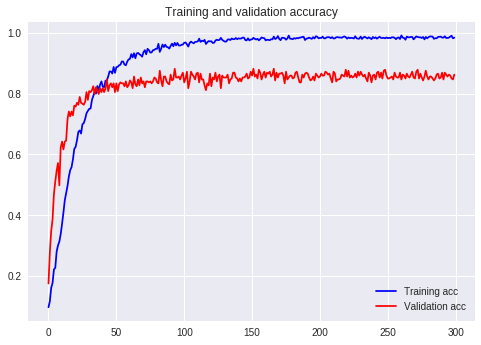

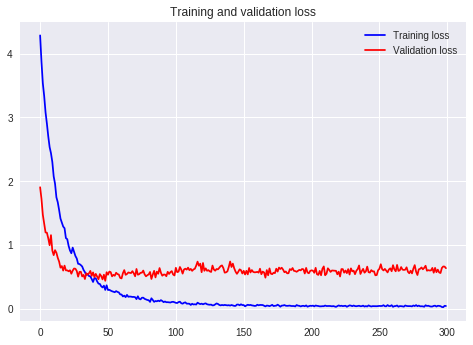

Found 157 images belonging to 12 classes.
16/15 [==============================] - 5s 295ms/step
No of errors = 21/157


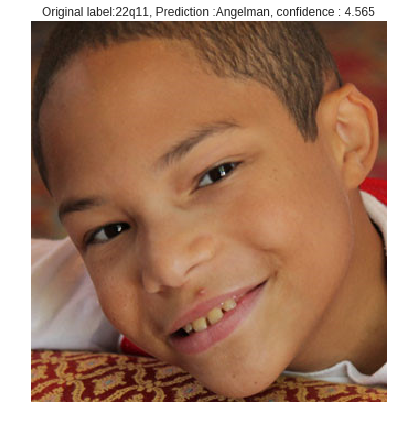

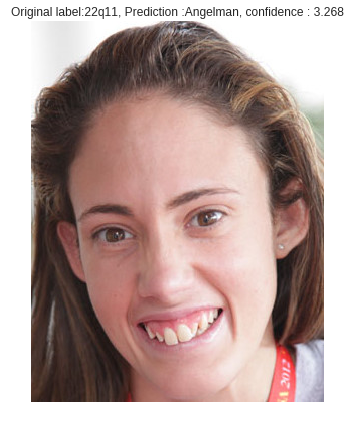

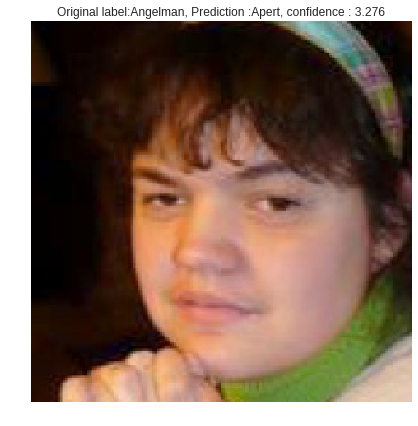

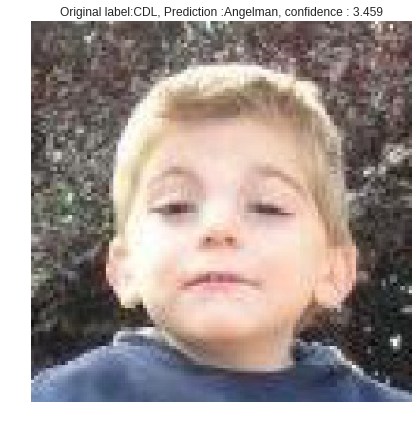

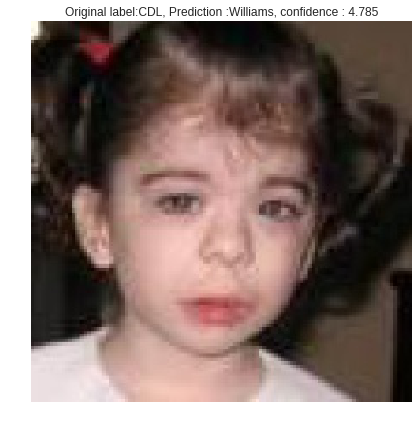

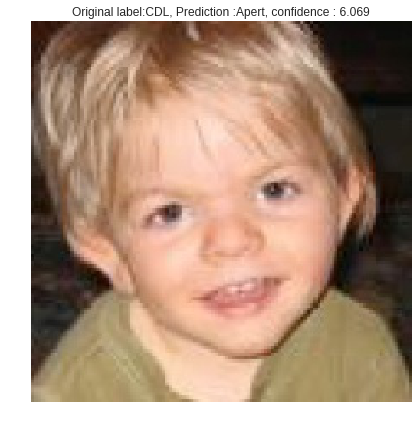

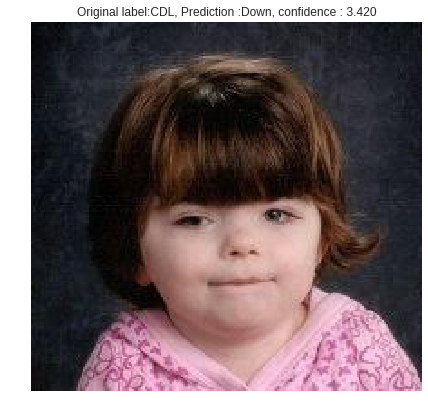

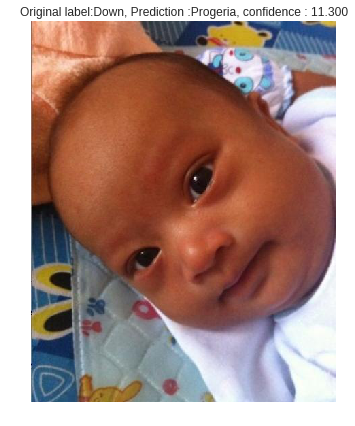

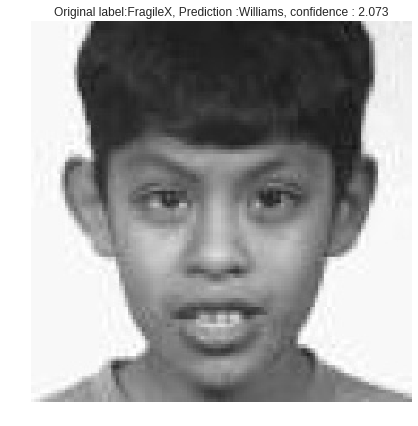

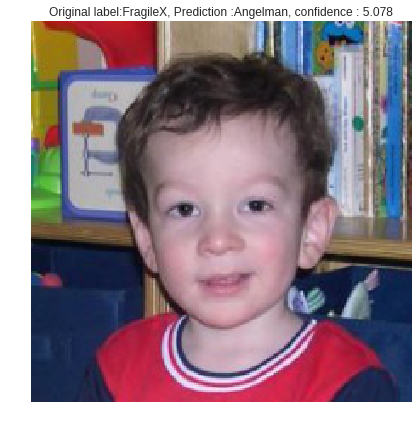

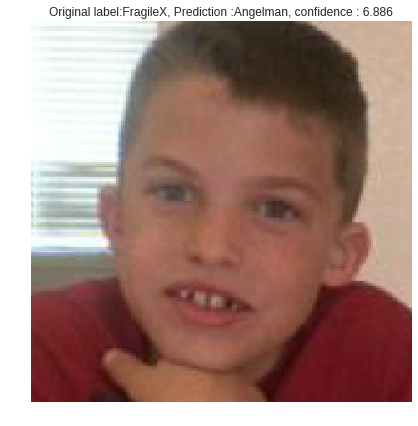

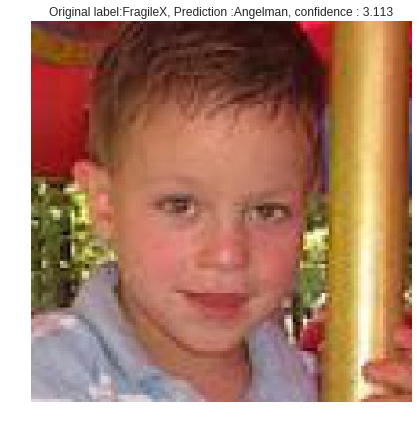

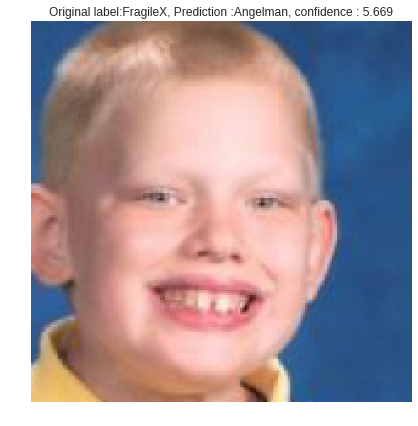

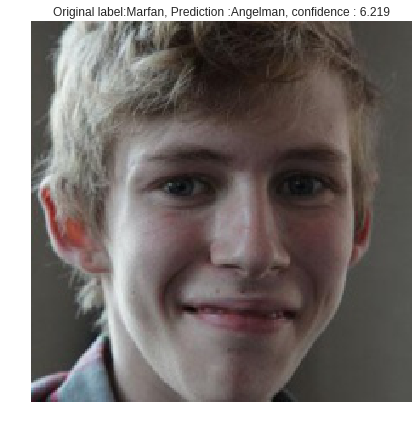

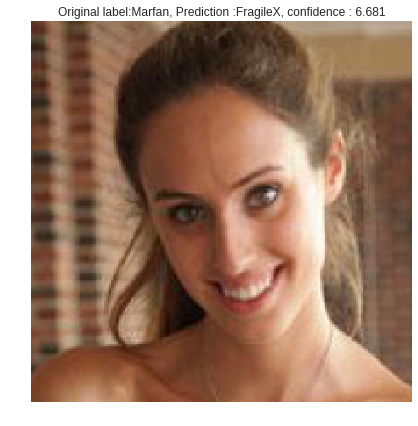

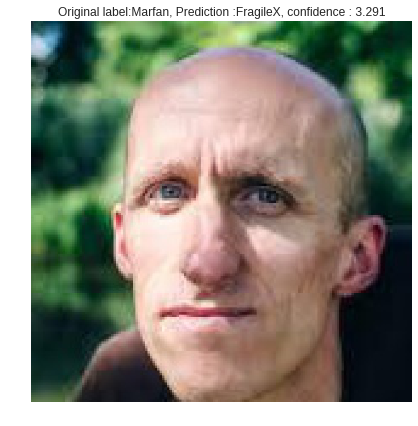

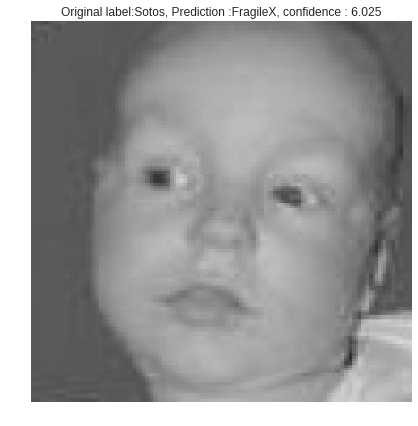

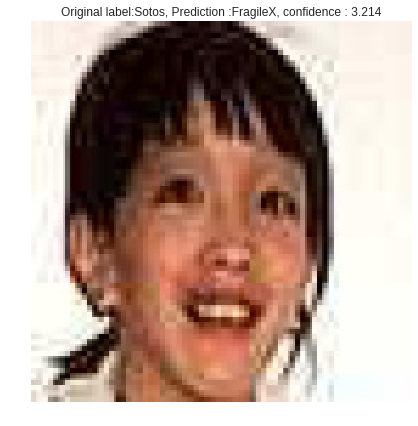

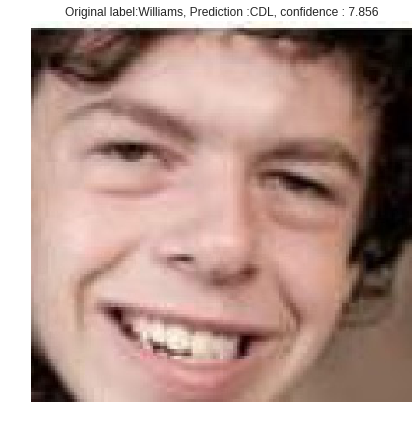

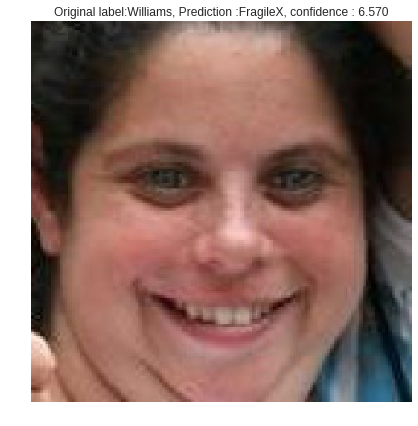

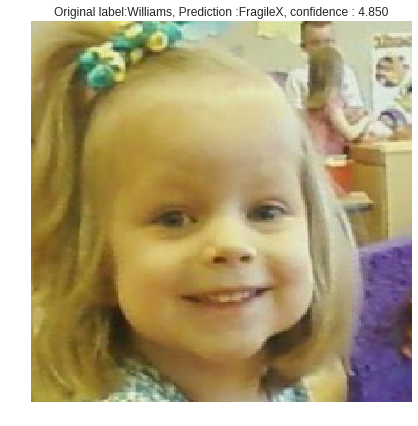

Confusion matrix, without normalization
[[ 0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  1  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  1  1 21  1  0  0  0  0  0  0  1]
 [ 0  0  0  0 18  0  0  1  0  0  0  0]
 [ 0  4  0  0  0 12  0  0  0  0  0  1]
 [ 0  1  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  1  0  2  0  0  0  0  0 20]]


NameError: ignored

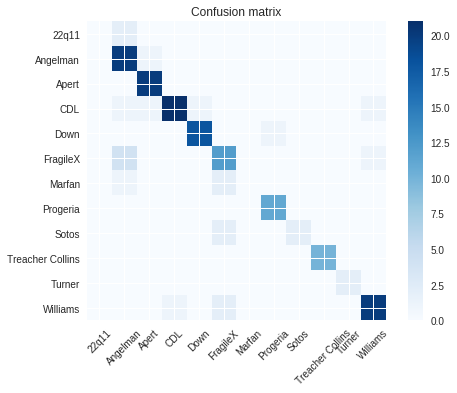

In [7]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

train_data_path = 'cropped_train'
validation_data_path = 'cropped_val'
test_data_path = 'test_cropped/'
#Parametres
img_width, img_height = 224, 224

#Load the VGG model
#vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

vggface = VGGFace(model='resnet50', include_top=False, input_shape=(img_width, img_height, 3))
vggface.summary()
#vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))

last_layer = vggface.get_layer('avg_pool').output
x = Flatten(name='flatten')(last_layer)
xx = Dense(256, activation = 'relu')(x)
x1 = BatchNormalization()(xx)
x2 = Dropout(0.6)(x1)

y = Dense(256, activation = 'relu')(x2)
yy = BatchNormalization()(y)
y1 = Dropout(0.6)(yy)

z = Dense(256, activation = 'relu')(y1)
zz = BatchNormalization()(z)
z1 = Dropout(0.6)(zz)

x3 = Dense(12, activation='linear', name='classifier')(z1)

custom_vgg_model = Model(vggface.input, x3)

# Create the model
model = models.Sequential()
 
# Add the convolutional base model
model.add(custom_vgg_model)
 
# Add new layers
#model.add(layers.Flatten())
# model.add(layers.Dense(1024, activation='relu'))
# model.add(BatchNormalization())
#model.add(layers.Dropout(0.5))
# model.add(layers.Dense(12, activation='sigmoid'))
 
# Show a summary of the model. Check the number of trainable parameters
#model.summary()

def precision(y_true, y_pred):
    """Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fbeta_score(y_true, y_pred, beta=1):
    """Computes the F score.
    The F score is the weighted harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    """
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')

    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score


def fmeasure(y_true, y_pred):
    """Computes the f-measure, the harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
    """
    return fbeta_score(y_true, y_pred, beta=1)

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 

validation_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
# Change the batchsize according to your system RAM
train_batchsize = 32
val_batchsize = 32
 
train_generator = train_datagen.flow_from_directory(
        train_data_path,
        target_size=(img_width, img_height),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_path,
        target_size=(img_width, img_height),
        batch_size=val_batchsize,
        class_mode='categorical')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=100, min_lr=1e-8)

checkpoint = ModelCheckpoint(filepath='checkpoint-{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=0, save_best_only=True)


# Compile the model
model.compile(loss='categorical_hinge',
              optimizer=optimizers.SGD(lr=1e-4, momentum = 0.9),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=300,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1, 
      callbacks=[reduce_lr, checkpoint])
 
# Save the model
model.save('keras_vggface_400_lr4_3FC_SVM.h5')

# loss and accuracy curves.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()




import numpy as np
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        test_data_path,
        target_size=(img_width, img_height),
        batch_size=10,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = image.load_img('{}/{}'.format(test_data_path,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()
    
    
cm = confusion_matrix(ground_truth, predicted_classes)
cm



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm_label = ['22q11', 'Angelman', 'Apert', 'CDL','Down', 'FragileX', 'Marfan','Progeria', 'Sotos', 'Treacher Collins', 'Turner', 'Williams']
plot_confusion_matrix(cm, classes=cm_label,
                      title='Confusion matrix')


from sklearn.metrics import accuracy_score
accuracy_score(ground_truth, predicted_classes)





In [8]:
TruePositive = np.diag(cm)
print("TP is" + str(TruePositive) )

FalsePositive = []
for i in range(12):
    FalsePositive.append(sum(cm[:,i]) - cm[i,i])

print("FP is" + str(FalsePositive) )
        
FalseNegative = []
for i in range(12):
    FalseNegative.append(sum(cm[i,:]) - cm[i,i])
    
print("FN is" + str(FalseNegative) )

TrueNegative = []
for i in range(12):
    temp = np.delete(cm, i, 0)   # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TrueNegative.append(sum(sum(temp)))
   
print("TN is" + str(TrueNegative) )  


TP is[ 0 20 20 21 18 12  0 11  2 10  2 20]
FP is[0, 8, 2, 1, 1, 6, 0, 1, 0, 0, 0, 2]
FN is[2, 1, 0, 4, 1, 5, 3, 0, 2, 0, 0, 3]
TN is[155, 128, 135, 131, 137, 134, 154, 145, 153, 147, 155, 132]


Found 157 images belonging to 12 classes.
16/15 [==============================] - 7s 462ms/step
No of errors = 26/157


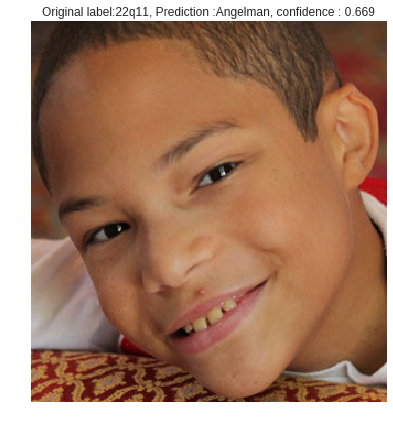

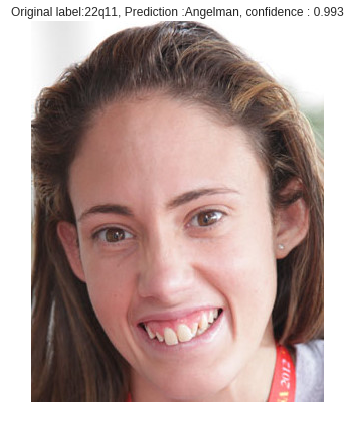

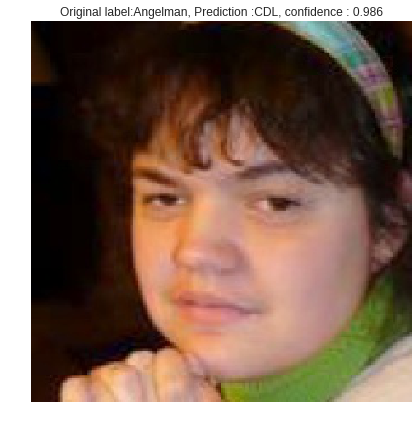

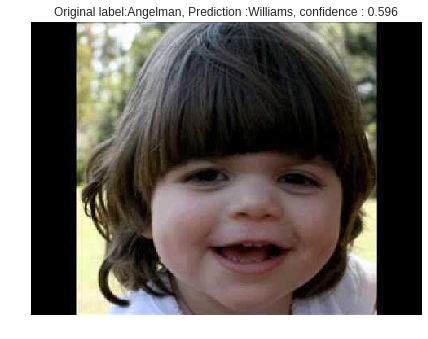

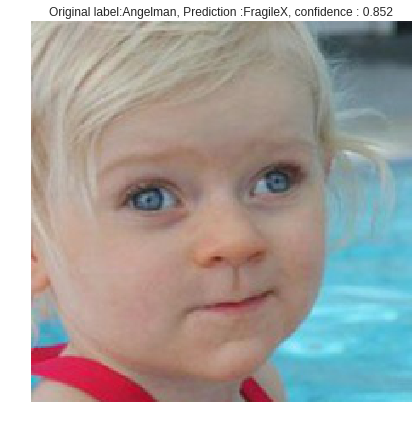

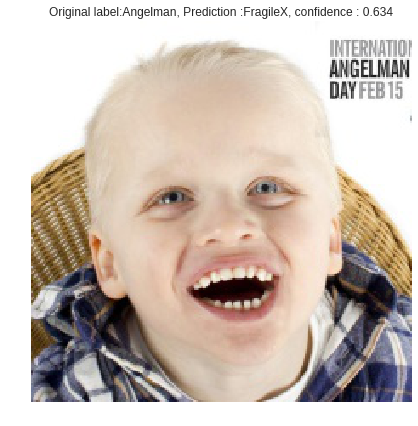

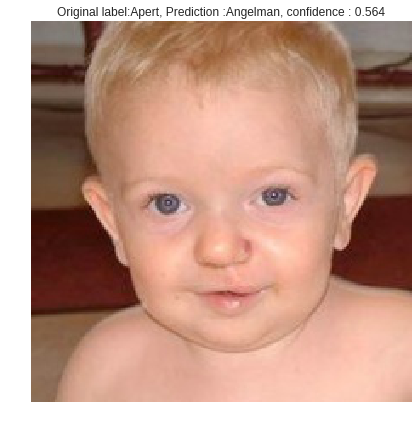

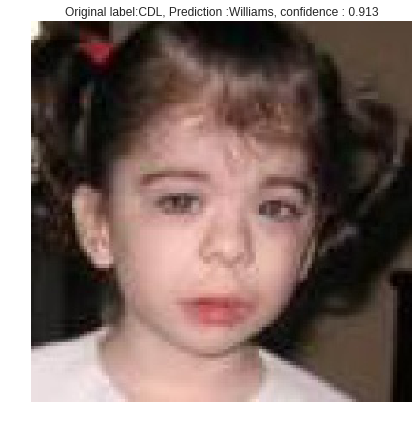

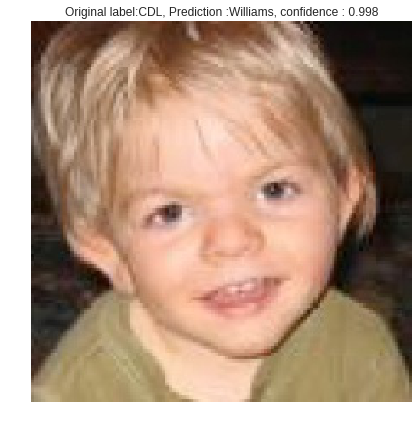

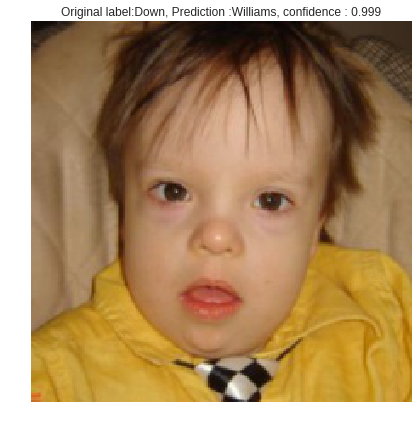

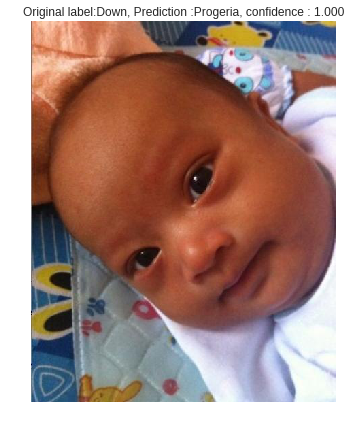

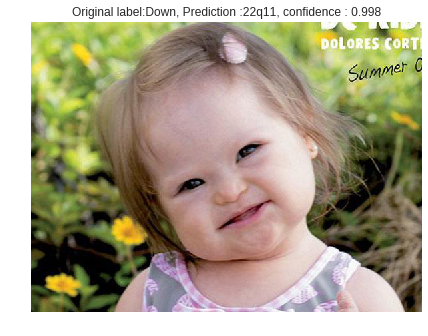

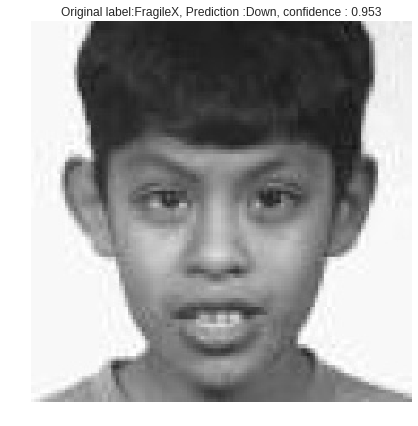

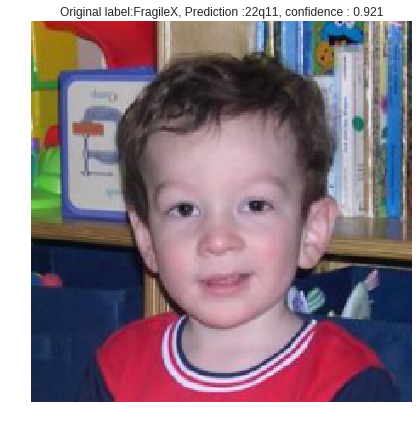

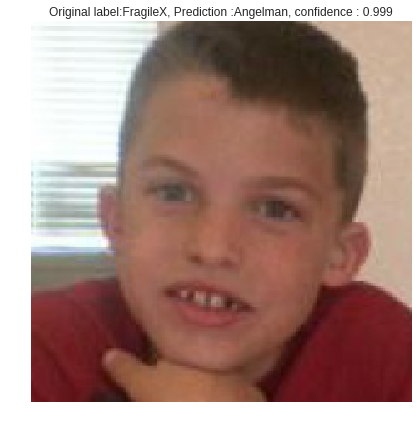

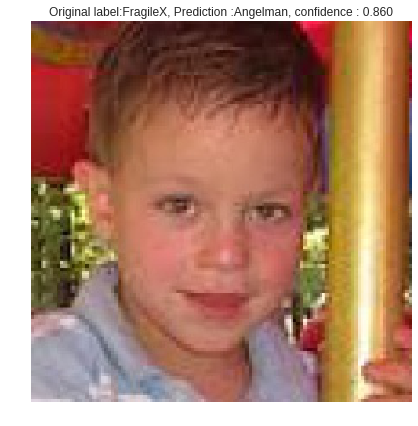

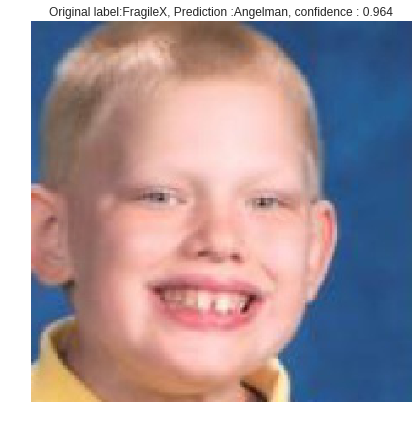

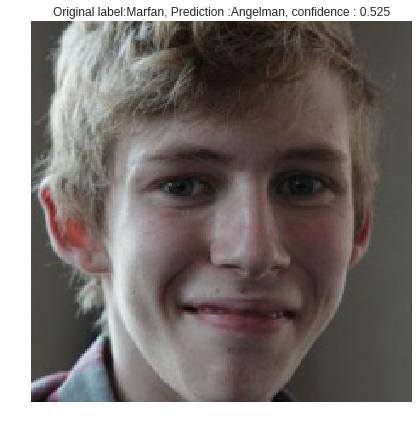

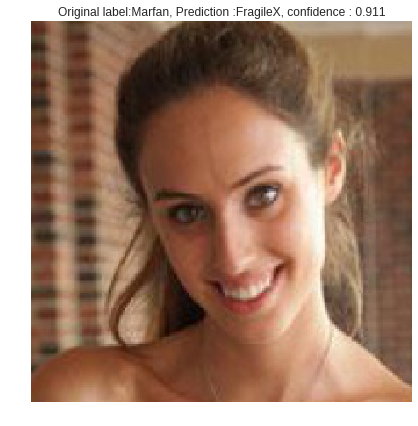

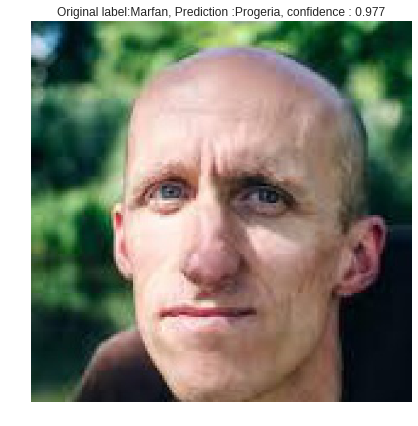

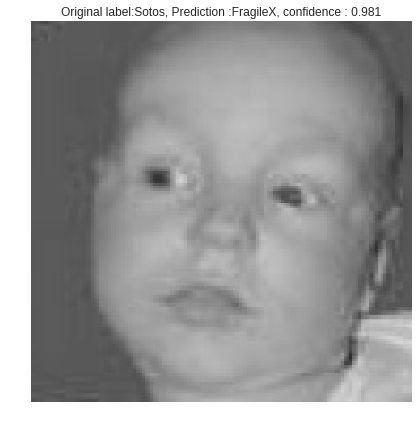

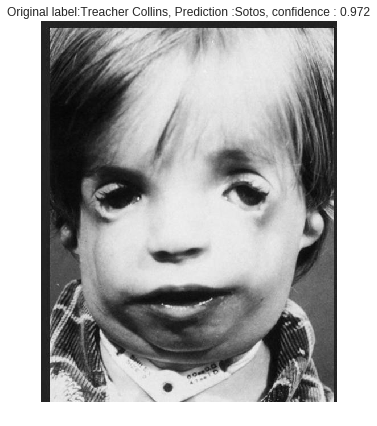

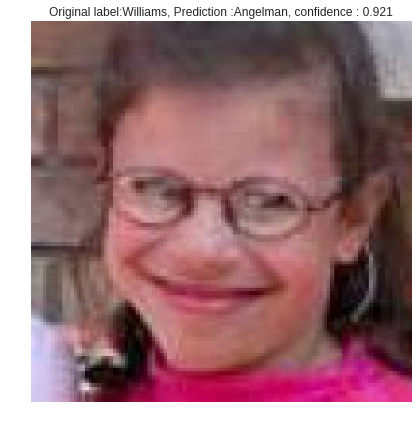

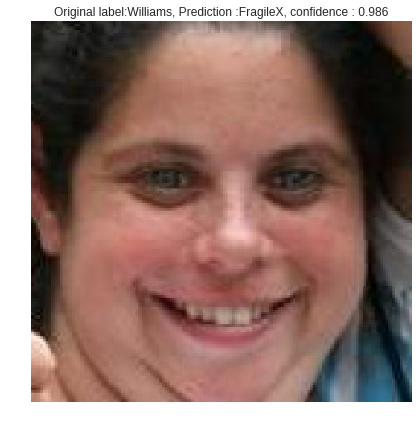

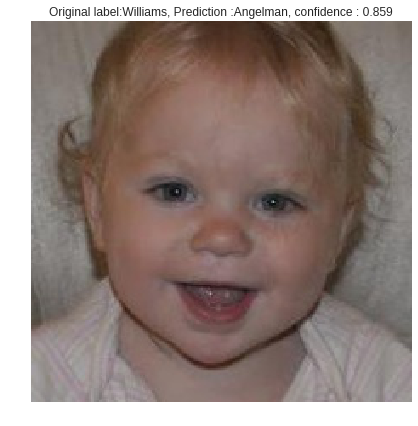

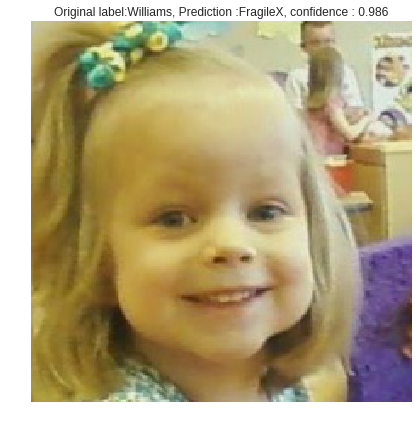

In [20]:
import numpy as np
from keras.preprocessing import image
test_data_path = 'test_cropped'
model = load_model('keras_vggface_200_lr4_2FC.h5')


# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        test_data_path,
        target_size=(img_width, img_height),
        batch_size=10,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = image.load_img('{}/{}'.format(test_data_path,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()






In [19]:
model = load_model('keras_vggface_200_lr4_2FC.h5')

test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_data_path,
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   



Found 157 images belonging to 12 classes.
                  precision    recall  f1-score   support

           22q11       0.00      0.00      0.00         2
        Angelman       0.00      0.00      0.00        21
           Apert       0.00      0.00      0.00        20
             CDL       0.16      1.00      0.27        25
            Down       0.00      0.00      0.00        19
        FragileX       0.00      0.00      0.00        17
          Marfan       0.00      0.00      0.00         3
        Progeria       0.00      0.00      0.00        11
           Sotos       0.00      0.00      0.00         4
Treacher Collins       0.00      0.00      0.00        10
          Turner       0.00      0.00      0.00         2
        Williams       0.00      0.00      0.00        23

     avg / total       0.03      0.16      0.04       157



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
# from google.colab import files
# files.download('checkpoint-93-0.53.hdf5')
!ls

checkpoint-01-2.45.hdf5  checkpoint-14-0.88.hdf5  checkpoint-36-0.61.hdf5
checkpoint-02-2.05.hdf5  checkpoint-18-0.86.hdf5  checkpoint-56-0.60.hdf5
checkpoint-03-1.80.hdf5  checkpoint-19-0.83.hdf5  cropped_train
checkpoint-05-1.75.hdf5  checkpoint-20-0.83.hdf5  cropped_val
checkpoint-06-1.58.hdf5  checkpoint-23-0.81.hdf5  datalab
checkpoint-07-1.32.hdf5  checkpoint-24-0.79.hdf5  dataset_cfps.zip
checkpoint-08-1.23.hdf5  checkpoint-25-0.72.hdf5  keras_vggface_200_lr4_2FC.h5
checkpoint-09-1.15.hdf5  checkpoint-27-0.69.hdf5  test
checkpoint-10-1.06.hdf5  checkpoint-31-0.67.hdf5  test_cfps.zip
checkpoint-12-1.05.hdf5  checkpoint-32-0.66.hdf5  test_cropped


In [15]:
!pip install pydot3
# test_generator = ImageDataGenerator()
# test_data_generator = test_generator.flow_from_directory(
#     "test_directory",
#     batch_size=32,
#     shuffle=False)
# test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

# predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# # Get most likely class
# predicted_classes = numpy.argmax(predictions, axis=1) 


In [7]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

ImportError: ignored

In [21]:
import numpy as np
from keras.preprocessing import image
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
test_data_path = 'test_cropped/22q11/'
# tensorflow
#model = VGGFace(model='resnet50') # default : VGG16 , you can use model='resnet50' or 'senet50'
model = load_model('keras_vggface_200_lr4_2FC.h5')

# Change the image path with yours.
for i in os.listdir(test_data_path):
  im = os.path.join(test_data_path + i)
  img = image.load_img(im, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = utils.preprocess_input(x, version=1) # or version=2
  preds = model.predict(x)
  print('Predicted:', utils.decode_predictions(preds))

ValueError: ignored